In [5]:
import pandas as pd
import numpy as np
import os

dir_path = os.getcwd()
dir_path

'C:\\Users\\LENOVO\\Documents\\GitHub\\DATASCIENCE\\BASIC'

In [74]:
df = pd.read_csv(os.path.join(dir_path, 'data/cardio_base.csv'))
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [22]:
smokeCount = [0,0]

for index, row in df.iterrows():
    smokeCount[int(row['gender']) - 1] += 1 if row['smoke'] == 1 else 0
#     print(row['id'])
    
smokeCount

[813, 5356]

In [23]:
smokeCount[1] / smokeCount[0]

6.587945879458794

In [36]:
height = df['height']
height_sorted = height.sort_values()

height_sorted[int(99 * len(height_sorted)/100)]
# print(height_sorted)

178

In [76]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,-0.047633
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


In [57]:
df_alco = pd.read_csv(os.path.join(dir_path, 'data/cardio_alco.csv'))
df_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [ ]:
df_alco.set_index()

In [79]:
ageCount = 0

# for index, row in df_alco.iterrows():
#     id = row['id;alco'].split(';')[0]
#     ageCount += 1 if 
    
# idset = np.array(df_alco)
for i in range(len(idset)):
    idset[i] = int(idset[i][0].split(';')[0])

In [64]:
idset.squeeze().shape

(56903,)

In [80]:
idset

array([[44],
       [45],
       [46],
       ...,
       [99951],
       [99952],
       [99954]], dtype=object)

In [81]:
df_alco = pd.DataFrame(idset)
df_alco.head()

,0
0,44
1,45
2,46
3,47
4,49


In [83]:
alco_age = df_alco.set_index(0).join(df.set_index('id'))

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [84]:
alco_age.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,,,,,,,,
44,14605,1,159,60.0,110,70,1,0
45,20652,1,160,73.0,130,85,1,0
46,21940,2,173,82.0,140,90,3,0
47,20404,1,163,55.0,120,80,1,0
49,18328,2,175,95.0,120,80,1,0


In [90]:
ageCount = 0

for index,row in alco_age.iterrows():
    ageCount += 1 if row['age']//365 > 50 else 0
    
ageCount

36874

In [92]:
ageCount / len(df)

0.5267714285714286

In [94]:
covid = pd.read_csv(os.path.join(dir_path, 'data/covid_data.csv'))
covid.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [103]:
covid_italy = covid.where(covid['location'] == 'Italy')
covid_germany = covid.where(covid['location'] == 'Germany')
covid_italy = covid_italy.dropna()
covid_germany = covid_germany.dropna()

In [125]:
def select_country(name, covid):
    covid_name = covid.where(covid['location'] == name)
    covid_name = covid_name.dropna()
    return covid_name

In [104]:
covid_italy

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
10688,Italy,2019-12-31,0.0,0.0,60461828.0,23.021,35220.084,3.18
10689,Italy,2020-01-01,0.0,0.0,60461828.0,23.021,35220.084,3.18
10690,Italy,2020-01-02,0.0,0.0,60461828.0,23.021,35220.084,3.18
10691,Italy,2020-01-03,0.0,0.0,60461828.0,23.021,35220.084,3.18
10692,Italy,2020-01-04,0.0,0.0,60461828.0,23.021,35220.084,3.18
...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518.0,85.0,60461828.0,23.021,35220.084,3.18
10847,Italy,2020-06-07,270.0,72.0,60461828.0,23.021,35220.084,3.18
10848,Italy,2020-06-08,197.0,53.0,60461828.0,23.021,35220.084,3.18
10849,Italy,2020-06-09,280.0,65.0,60461828.0,23.021,35220.084,3.18


In [105]:
covid_germany

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
7914,Germany,2019-12-31,0.0,0.0,83783945.0,21.453,45229.245,8.0
7915,Germany,2020-01-01,0.0,0.0,83783945.0,21.453,45229.245,8.0
7916,Germany,2020-01-02,0.0,0.0,83783945.0,21.453,45229.245,8.0
7917,Germany,2020-01-03,0.0,0.0,83783945.0,21.453,45229.245,8.0
7918,Germany,2020-01-04,0.0,0.0,83783945.0,21.453,45229.245,8.0
...,...,...,...,...,...,...,...,...
8072,Germany,2020-06-06,407.0,33.0,83783945.0,21.453,45229.245,8.0
8073,Germany,2020-06-07,301.0,22.0,83783945.0,21.453,45229.245,8.0
8074,Germany,2020-06-08,214.0,6.0,83783945.0,21.453,45229.245,8.0
8075,Germany,2020-06-09,350.0,37.0,83783945.0,21.453,45229.245,8.0


In [113]:
import matplotlib.pyplot as plt

date_time = pd.to_datetime(covid_germany['date'])

DF = pd.DataFrame()
value_germany = []
totCases = 0
for i in covid_germany['new_cases']:
    totCases += i    
    value_germany.append(totCases)
    
value_italy = []
totCases = 0
for i in covid_italy['new_cases']:
    totCases += i    
    value_italy.append(totCases)


In [119]:
date = np.array(covid_germany['date'])

for i,j in zip(range(len(value_italy)), date):
    if np.absolute(value_italy[i] - value_germany[i]) > 10000:
        print(date[i])
        break
    
    

2020-03-12


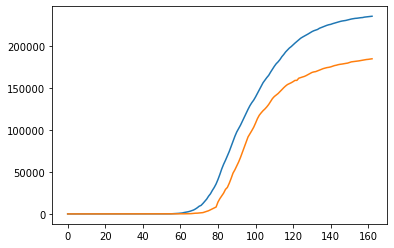

In [114]:
for i in [value_italy, value_germany]:
    DF['value'] = i
    DF.set_index(date_time)
    plt.plot(DF)
    
plt.show()

In [121]:
countries = covid['location'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [139]:
death_rate = []

for country in countries:
    tmp = select_country(country, covid)
#     death_rate.append(sum(tmp['new_deaths']) / (sum(tmp['population'])/len(tmp['population'])))
#     print(sum(tmp['new_deaths']) )
    print(len(tmp))
    
print(death_rate)

153
94
158
0
0
0
83
96
154
0
163
163
156
85
162
99
85
163
163
79
86
0
89
91
0
90
71
163
0
92
93
90
71
154
90
163
82
0
87
0
98
163
98
40
0
95
0
163
0
0
91
163
0
163
84
0
154
158
159
84
88
81
163
89
0
0
83
163
163
0
89
85
160
163
89
0
163
0
80
0
88
0
88
0
88
83
89
0
99
163
162
156
163
161
162
0
163
163
90
163
0
90
90
97
0
160
84
78
103
159
0
86
78
0
163
156
154
82
69
163
0
77
96
0
83
163
93
0
87
85
0
125
80
80
0
163
163
0
161
84
82
0
0
163
157
158
0
94
0
96
99
159
100
102
0
159
161
163
0
0
88
79
0
63
97
0
106
88
0
163
0
95
97
0
125
163
0
162
154
89
83
88
163
163
0
0
41
86
156
81
89
90
94
89
0
81
89
157
163
163
0
88
87
0
88
163
0
62
84
82
163
0
[]
